In [1]:
import sys
# For Unix base OS
sys.path.append('../stableBL/')
# For Windows OS
# sys.path.append('..\stableBL\')
from pgo import DiscreteAgent
import torch
import numpy as np
import gymnasium as gym

In [2]:
# Using deterministic random to ensure that initial weights will be the same
torch.manual_seed(42)
print("finish")

finish


In [3]:
env = gym.make("MountainCar-v0")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
print(state_dim, action_dim)

2 3


In [4]:
agent = DiscreteAgent(state_dim, action_dim)

In [5]:
rewards = []
min_action = 1e9

for episode in range(500):
    state, _ = env.reset()
    episode_reward = 0
    done = False
    step_action = 0
    
    while not done:
        action, log_prob = agent.select_action(state)
        next_state, reward, done, _, _ = env.step(action)
        agent.store_outcome(reward, log_prob)
        state = next_state
        episode_reward += reward
        
        step_action += 1
        
        if episode > 0 and step_action > min_action:
            print(f"Failed under minimum {step_action}")
            break
    
    # Just to set the limit of the exploration which causing long training time
    if step_action < min_action and step_action > 500 and done:
        print(f"Success under minimum {step_action}")
        min_action = max(step_action, 1000)
        
    agent.update_policy()
    rewards.append(episode_reward)
    
    if episode % 10 == 0:
        print(f"Episode {episode}, Total Reward: {episode_reward}")

Success under minimum 6328
Episode 0, Total Reward: -6328.0
Success under minimum 2076
Failed under minimum 2077
Success under minimum 1159
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Episode 10, Total Reward: -1160.0
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Episode 20, Total Reward: -1160.0
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Failed under minimum 1160
Episode 30, Total Reward: -1160.0
Failed under minimum 1160
Failed under minimum 1160
Fail

KeyboardInterrupt: 

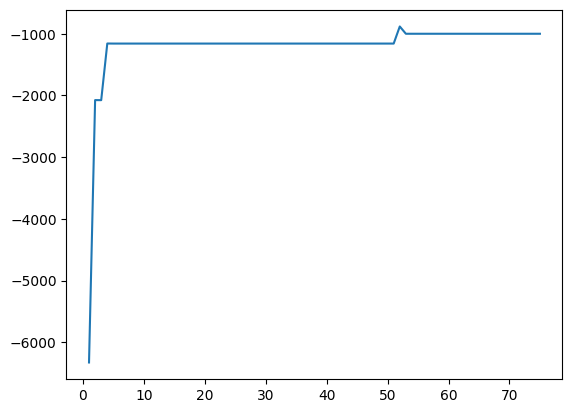

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(1, len(rewards), len(rewards), dtype=np.int64), rewards)
plt.show()